# Netzwerk Vs6

Radius-schweiz.ch bringt Leute mit unterschiedlichen politischen Meinungen für ein Gespräch zusammen. Ein Update des Matching-Mechanismus sieht vor, dass die User bei den Fragen ja, nein oder egal anwählen können. 

Der Code berechnet die Wahrscheinlichkeit, wie viele Paare es geben wird, die ein Gespräch führen können. Dabei lässt sich einstellen wie viele User und Fragen es gibt, wie viele Fragen den Leuten im Schnitt egal sind, und wie viele Fragen von den Usern unterschiedlich beantwortet werden müssen damit sich ein Gespräch lohnt.

19/50 users matched; average questions answered: 3.335


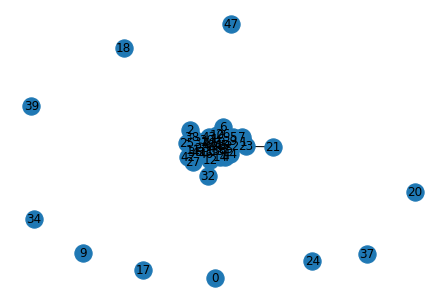

In [57]:
# import stuff
import networkx as nx
import random
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import math

# set values
n_users = 50
n_questions = 5
p_dontcare = 0.333
min_disagreements = 2

# count disagreements
def n_disagreements(a, b):
    count = 0
    if len(a) == len(b):
        for i,j in zip(a,b):
            if i+j == 1:
                count += 1
        return count
    return -1 

# generate one answer
def create_answer(p_dontcare):
    chance = random.random()
    if chance <= p_dontcare:
        rand = -1
    elif chance > (1-(1-p_dontcare)/2):
        rand = 0
    else:
        rand = 1
    return(rand)

# generate a set of answer for each user
def create_answer_arrays(n_users, n_questions, p_dontcare):
    arrays = [[create_answer(p_dontcare) for j in range (n_questions)] for i in range(n_users)]
    return arrays

# create graph, add nodes for each user, add edges if disagreements are high enough 
def simulate_user_numbers(n_users, n_questions, p_dontcare):
    arrays = create_answer_arrays(n_users, n_questions, p_dontcare)
    G = nx.Graph()
    G.add_nodes_from(list(range(n_users)))
    for i, j in itertools.combinations(range(n_users), 2):
        disagreements = n_disagreements(arrays[i],arrays[j])
        if disagreements > min_disagreements:
            G.add_edge(j,i, weight = math.log(disagreements))
    matching = nx.max_weight_matching(G)
    # print nr of pairs possible, print average questions answered, print graph
    print(str(len(matching)) + "/" + str(n_users), "users matched; average questions answered: " + str(n_questions * (1-p_dontcare)))
    nx.draw(G, with_labels=True)

simulate_user_numbers(n_users, n_questions, p_dontcare)
